# Prosper Loan Data Exploration 
## by Khadija Mahmoud

## 1- Preliminary Wrangling

> This data set contains 113,937 loans with 81 variables on each
loan, including loan amount, borrower rate (or interest rate),
current loan status, borrower income, and many others.


#### a) Import important libraries

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

#### b) Dataset loading and observation
 

In [2]:
#load data set
df=pd.read_csv("prosperLoanData.csv")
df.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [3]:
#observe certain columns
df['Occupation']

0                           Other
1                    Professional
2                           Other
3                   Skilled Labor
4                       Executive
                   ...           
113932    Food Service Management
113933               Professional
113934                      Other
113935               Food Service
113936                  Professor
Name: Occupation, Length: 113937, dtype: object

In [4]:
#observe dataset dimensionlity
df.shape

(113937, 81)

#### c) Data cleaning


In [5]:
#first  make a dataset of interest
prosper=df[['Investors','LoanOriginalAmount','MonthlyLoanPayment','Recommendations','PercentFunded','TotalTrades','IncomeRange','StatedMonthlyIncome','CurrentlyInGroup','IsBorrowerHomeowner','Occupation','EmploymentStatus','ListingCategory (numeric)','BorrowerRate','BorrowerAPR','LoanStatus','Term']]
prosper.head(2)


,Investors,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,PercentFunded,TotalTrades,IncomeRange,StatedMonthlyIncome,CurrentlyInGroup,IsBorrowerHomeowner,Occupation,EmploymentStatus,ListingCategory (numeric),BorrowerRate,BorrowerAPR,LoanStatus,Term
0,258,9425,330.43,0,1.0,11.0,"$25,000-49,999",3083.333333,True,True,Other,Self-employed,0,0.158,0.16516,Completed,36
1,1,10000,318.93,0,1.0,29.0,"$50,000-74,999",6125.000000,False,False,Professional,Employed,2,0.092,0.12016,Current,36


In [6]:
# observe dataset of interest information
prosper.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Investors                  113937 non-null  int64  
 1   LoanOriginalAmount         113937 non-null  int64  
 2   MonthlyLoanPayment         113937 non-null  float64
 3   Recommendations            113937 non-null  int64  
 4   PercentFunded              113937 non-null  float64
 5   TotalTrades                106393 non-null  float64
 6   IncomeRange                113937 non-null  object 
 7   StatedMonthlyIncome        113937 non-null  float64
 8   CurrentlyInGroup           113937 non-null  bool   
 9   IsBorrowerHomeowner        113937 non-null  bool   
 10  Occupation                 110349 non-null  object 
 11  EmploymentStatus           111682 non-null  object 
 12  ListingCategory (numeric)  113937 non-null  int64  
 13  BorrowerRate               11

In [7]:
# observe dataset of interest dimensionality
prosper.shape

(113937, 17)

In [8]:
#drop missing values
prosper.dropna(inplace=True)

/home/khadija/anaconda3/envs/spyder/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
# assure there is no missing data
prosper.isna().any().any()

False

### What is the structure of your dataset?
113937 rows and 17 columns


### What is/are the main feature(s) of interest in your dataset?

 features wrapped relationships between borrower and loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that describe the borrower income ,employment status and what kind of loan he needs.

## Univariate Exploration

we look to data distributions and frequency seperately

#### a) what does borrower monthly income look like ?

In [10]:
# make function to be called whenever needed to change the labels
def custom_labels(x_label,y_label,title):
    plt.title(title,fontsize=20)
    plt.xlabel(x_label,fontsize=14)
    plt.ylabel(y_label,fontsize=14)

In [11]:
# the log  base 10 of income values is under 6.25
np.log10(prosper['StatedMonthlyIncome'].describe())

/home/khadija/anaconda3/envs/spyder/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.021433
mean     3.755514
std      3.883477
min          -inf
25%      3.522879
50%      3.679155
75%      3.839897
max      6.243039
Name: StatedMonthlyIncome, dtype: float64

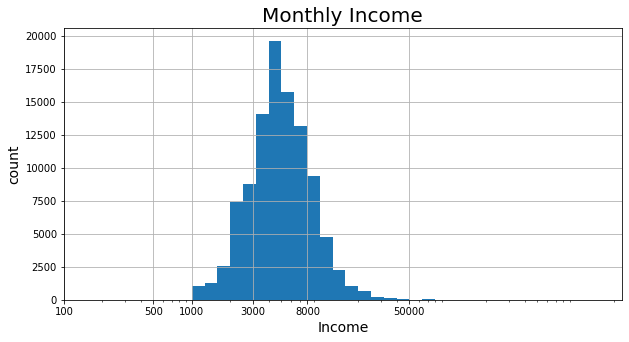

In [12]:
# apply logarithmics transformation
bins= 10**np.arange(3,6.25,0.1)
ticks=[100,500,1000,3000,8000,50000]
labels=['{}'.format(v) for v in ticks]
prosper['StatedMonthlyIncome'].hist(figsize=(10,5), bins=bins);
plt.xscale('log')
# use our function to represent current graph labels
custom_labels('Income','count','Monthly Income')
plt.xticks(ticks,labels);

> the most frequent monthly income is 3K-8K

#### b) what is frequent income range of the borrower?


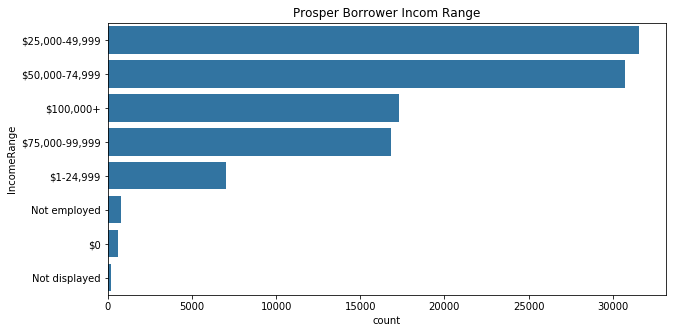

In [13]:
#distribution using Seaborn bar plot 
plt.figure(figsize=(10,5));
sb.countplot(data = prosper, y='IncomeRange',color=sb.color_palette()[0]);
plt.title('Prosper Borrower Incom Range');

> the most frequent income range is 25K-50K and 50K-75K

#### c) what is the borrower employment status?

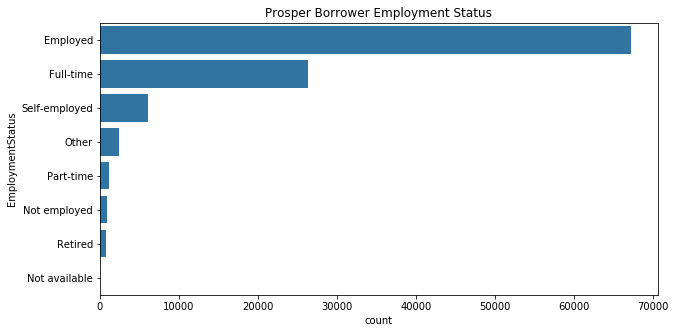

In [14]:
# barplot for employment status
plt.figure(figsize=(10,5));

sb.countplot(data = prosper, y='EmploymentStatus',color=sb.color_palette()[0],order=prosper['EmploymentStatus'].value_counts().index);
plt.title('Prosper Borrower Employment Status');

> most of borrowers have to be employed or have full time job

#### c) what the distribution of borrower reputation?

In [15]:
# describe rate values
prosper['BorrowerRate'].describe()

count    105059.000000
mean          0.193116
std           0.075355
min           0.000000
25%           0.133400
50%           0.184000
75%           0.251100
max           0.360000
Name: BorrowerRate, dtype: float64

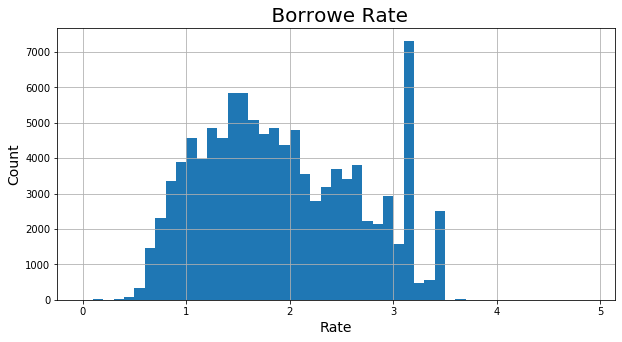

In [16]:
# histogram plot of borrower rate
(prosper['BorrowerRate']*10).hist(figsize=(10,5),bins=10*np.arange(0,0.5,.01));
#manage labels
custom_labels('Rate','Count',' Borrowe Rate')

> the distribution is skewed to the right,the majority of borrower rate is from 1 to 2 on a scale from 0 to 5

#### d) what is the loan amount distribution?

In [17]:
#observe loan amount statistics after scaling to logarithmic scale
np.log10(prosper['LoanOriginalAmount'].describe())

count    5.021433
mean     3.933225
std      3.797787
min      3.000000
25%      3.602060
50%      3.845098
75%      4.079181
max      4.544068
Name: LoanOriginalAmount, dtype: float64

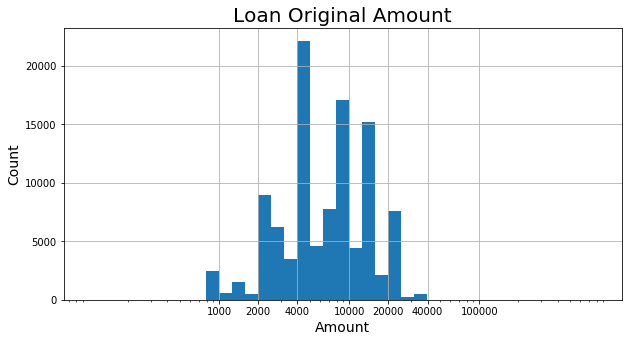

In [18]:
# apply logarithmics transformation
plt.figure(figsize=(10,5))
bins= 10**np.arange(2,6,0.1)
ticks=[1000,2000,4000,10000,20000,40000,100000]
labels=['{}'.format(v) for v in ticks]
prosper['LoanOriginalAmount'].hist( bins=bins);
#manage labels
custom_labels('Amount','Count','Loan Original Amount')
plt.xscale('log')
plt.xticks(ticks,labels);

> the most frequent loan amount is between 4K to 10K

#### e) what is loan duration ?

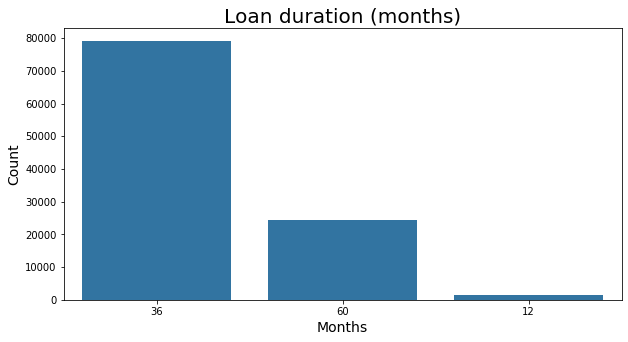

In [19]:
# barplot for loan duration
plt.figure(figsize=(10,5));
sb.countplot(data = prosper, x='Term',color=sb.color_palette()[0],order=prosper['Term'].value_counts().index);
#manage labels
custom_labels('Months','Count','Loan duration (months)')

> duration is calculated by months and there are 3 options 36 which is frequent, 60 and 12 months

#### d) what does monthly payment look like?

In [20]:
#monthly payment statistics 
prosper['MonthlyLoanPayment'].describe()

count    105059.000000
mean        279.255070
std         192.509098
min           0.000000
25%         138.660000
50%         229.320000
75%         377.980000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [21]:
# statistics after logarithmics transformation
np.log10(prosper['MonthlyLoanPayment'].describe())

/home/khadija/anaconda3/envs/spyder/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


count    5.021433
mean     2.446001
std      2.284451
min          -inf
25%      2.141951
50%      2.360442
75%      2.577469
max      3.352474
Name: MonthlyLoanPayment, dtype: float64

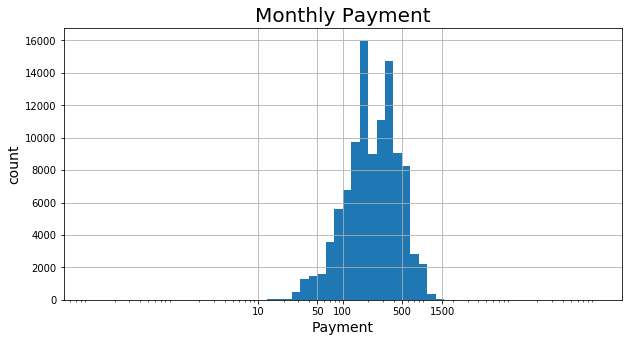

In [22]:
# apply logarithmics transformation
plt.figure(figsize=(10,5));
bins= 10**np.arange(-1,5+0.1,0.1)
ticks=[10,50,100,500,1500]
labels=['{}'.format(v) for v in ticks]
prosper['MonthlyLoanPayment'].hist(bins=bins);

#manage labels
custom_labels('Payment',
'count','Monthly Payment')


plt.xscale('log')
plt.xticks(ticks,labels);

> the most frequent monthyl amount is 100-500 $

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the distribution of monthly payment , original loan amount and borrower monthly incom has unusual distributions, so we need to make tha logarithmic scale, I did so because these are financial data which has to be handeled in scaling

## Bivariate Exploration

> we investigate relations between two feature.

In [23]:
# remove outlier
Q1 = prosper.quantile(0.25)
Q3 = prosper.quantile(0.75)
IQR = Q3 - Q1
prosper_copy= prosper[~((prosper < (Q1 - 1.5 * IQR)) |(prosper > (Q3 + 1.5 * IQR))).any(axis=1)]

#### a) what is the relationship between original amount and loan monthly payment?

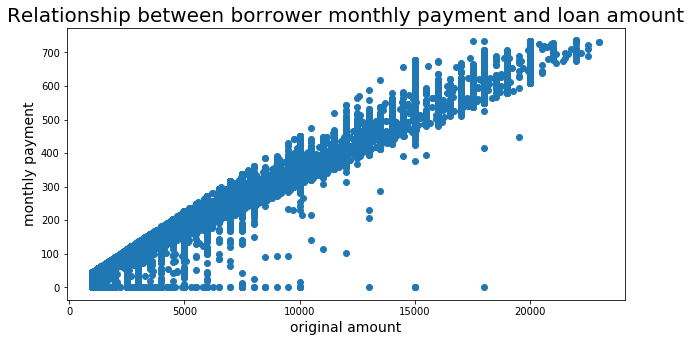

In [32]:
#scatter plot between original amount and loan monthly payment
plt.figure(figsize=(10,5))
plt.scatter(data=prosper_copy,x='LoanOriginalAmount',y='MonthlyLoanPayment');
#manage labels
custom_labels('original amount',
'monthly payment','Relationship between borrower monthly payment and loan amount')





> there is a strong positive linear relationship between original amount and loan monthly payment?

#### b) what is the relationship between borrower  monthly payment and monthly income ?

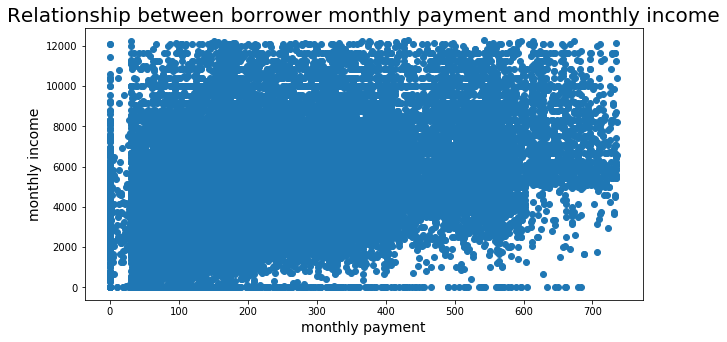

In [25]:
#scatter plot between borrower monthly payment and monthly income
plt.figure(figsize=(10,5))
plt.scatter(data=prosper_copy,x='MonthlyLoanPayment',y='StatedMonthlyIncome');
#manage labels
custom_labels('monthly payment',
'monthly income','Relationship between borrower monthly payment and monthly income')




> there no linear Relationship between borrower monthly payment and monthly income

#### c) what is the relationship between borrower monthly income and loan amount ?

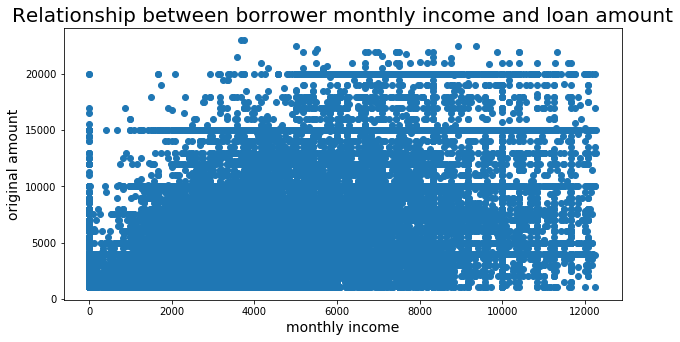

In [26]:
#scatter plot between borrower monthly income and loan amount
plt.figure(figsize=(10,5))
plt.scatter(data=prosper_copy,x='StatedMonthlyIncome',y='LoanOriginalAmount');
#manage labels
custom_labels('monthly income',
'original amount','Relationship between borrower monthly income and loan amount')



> there no linear Relationship between borrower monthly income and loan amount

#### d) what is the relationship between Borrower Rate and Percent Funded?

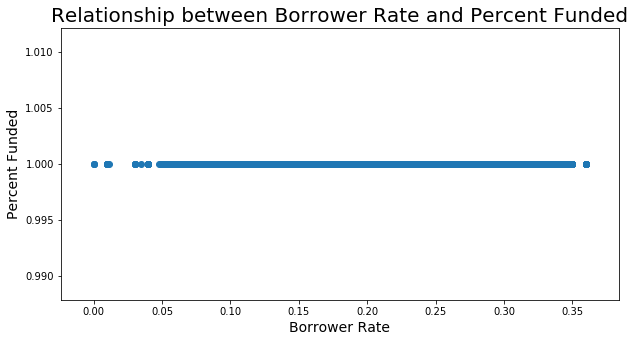

In [27]:
#scatter plot between Borrower Rate and Percent Funded
plt.figure(figsize=(10,5))
plt.scatter(data=prosper_copy,x='BorrowerRate',y='PercentFunded');
#manage labels
custom_labels('Borrower Rate',
'Percent Funded','Relationship between Borrower Rate and Percent Funded')

>there is no Relationship between Borrower Rate and Percent Funded

#### e) what is the relationship between Percent Funded and Original Amount?

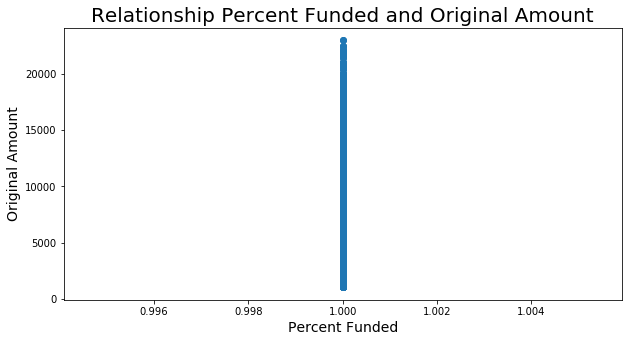

In [28]:
#scatter plot between Percent Funded and Original Amount 
plt.figure(figsize=(10,5))
plt.scatter(data=prosper_copy,x='PercentFunded',y='LoanOriginalAmount');
#manage labels
custom_labels('Percent Funded',
'Original Amount','Relationship Percent Funded and Original Amount')

> there is no relationship between Percent Funded and Original Amount

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> we found a strong positive linear relationship between borrower monthly payment and loan amount
> ,no linear Relationship between borrower monthly payment and monthly income
> and no linear Relationship between borrower monthly income and loan amount


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> no, there is a no  Relationship between Original Amount and Percent Funded and between Borrower Rate and Percent Funded


## Multivariate Exploration

> plots of three or more variables to investigate the data

#### a) How being a home owner borrower affects loan status?

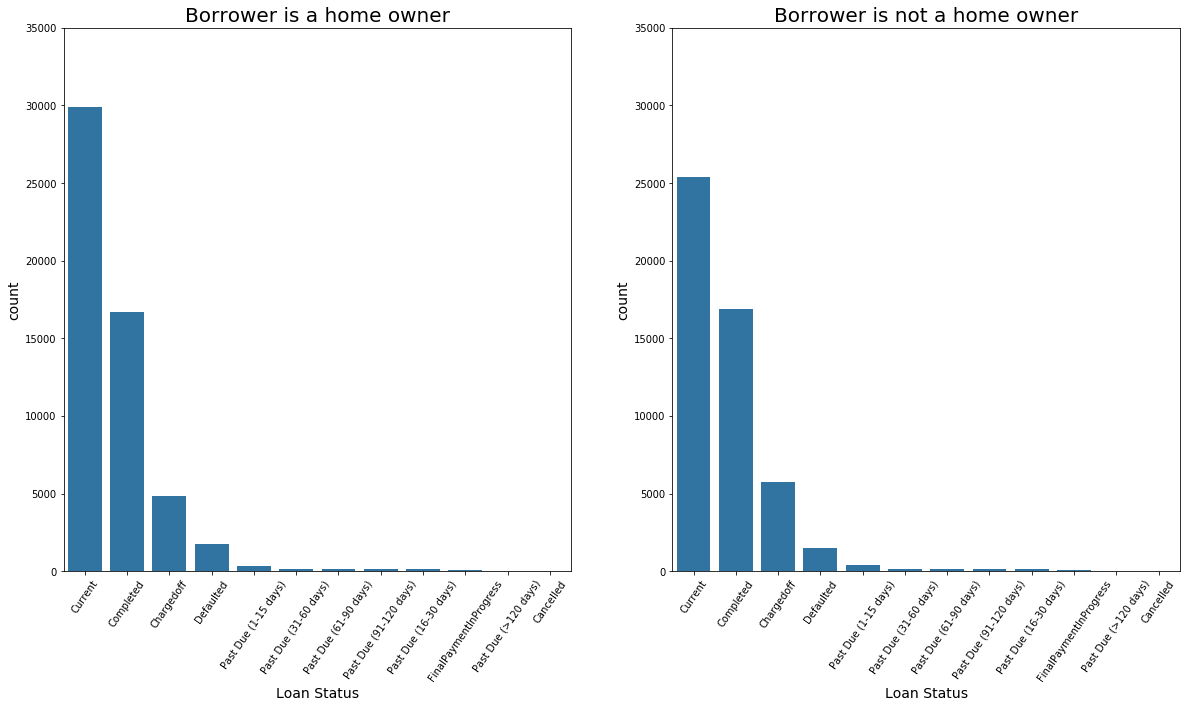

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
fig1=sb.countplot(x='LoanStatus',data=prosper[prosper['IsBorrowerHomeowner']==True],color=sb.color_palette()[0],
                 order=prosper['LoanStatus'].value_counts().index)
custom_labels('Loan Status','count','Borrower is a home owner')
plt.xticks(rotation=55)
plt.ylim([0,35000])

plt.subplot(1,2,2)
fig2=sb.countplot (x='LoanStatus',data=prosper[prosper['IsBorrowerHomeowner']==False],color=sb.color_palette()[0],
                  order=prosper['LoanStatus'].value_counts().index)
custom_labels('Loan Status','count','Borrower is not a home owner')
plt.xticks(rotation=55)

plt.ylim([0,35000])

plt.show()

> if the borrower was a home owner, it's more likely to have current loans more than not home owner borrowers.

#### b) how much monthly payment varies according to borrower employment status and loan amount ? 

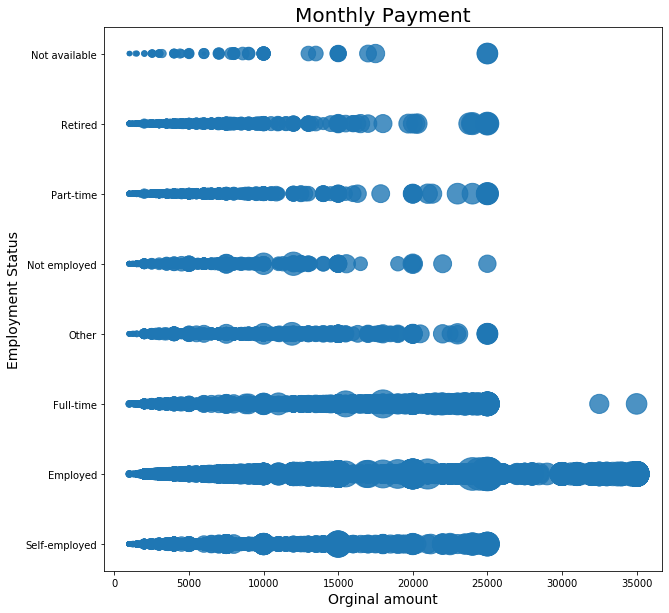

In [30]:
plt.figure(figsize=(10,10))
# regplotting
# prepare plottig to be approperaite to screen
sb.regplot(data=prosper,x='LoanOriginalAmount',y='EmploymentStatus',fit_reg=False,
              scatter_kws={'s':prosper['MonthlyLoanPayment']/2});
# manage labels
custom_labels('Orginal amount','Employment Status','Monthly Payment')


> payment is getting larger whenever the loan amount increased , but payment is increasing in fixed scale in many cases in different employment status of the borrower

> 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> if the borrower was a home owner, it's more likely to have current loans more than not home owner borrowers.

> payment is increasing according to loan amount and borrower employment status has almost no effect on it.
### Were there any interesting or surprising interactions between features?

> borrowers with not indicated employment status are not assigned to loan amount above 25K.
> Borrowers assigned to loan amount above 25K who are employed.